# Create a sterographic map of the Arctic and section in by regions
Here I will try to separate the Arctic by regions and plot it using matplotlib and cartopy, using a colorbar to section off every region. This will serve as a defenition of regions visually for the rest of the project. 

## the regions of interest in the Arctic are defined below:

| Initials  | Name                       | Latitude          | Longitude             |
|-----------|----------------------------|-------------------|-----------------------|
| `ao`      | Central Arctic             | $90^oN$ to $80^oN$ |  All                 |
| `cs`      | Chukchi Sea                | $80^oN$ to $60^oN$ |$-180^o$ to $-155^oW$ |
| `bs`      | Beaufort Sea               | $80^oN$ to $60^oN$ |$-155^oW$ to $-125^oW$|
| `ca`      | Canadian Archipelago       | $80^oN$ to $60^oN$ |$-125^oW$ to $-70^oW$ |
| `bb`      | Baffin Bay                 | $80^oN$ to $60^oN$ |$-70^oW$ to $-45^oW$  |                      
| `ess`     | Eastern Siberian Sea       | $80^oN$ to $60^oN$ |$145^oE$ to $180^o$   |                       
| `ls`      | Laptev Sea                 | $80^oN$ to $60^oN$ |$90^oE$ to $145^oE$   |                      
| `ks`      | Kara Sea                   | $80^oN$ to $60^oN$ |$53^oE$ to $90^oE$    |                      
| `bts`     | Barents Sea                | $80^oN$ to $60^oN$ |$20^oE$ to $53^oE$    |                      
| `ns`      | Nordic Sea                 | $80^oN$ to $60^oN$ |$-45^oW$ to $20^oE$   | 

import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns## this is the actual values of the differnt regions that I want 
Arctic Regions

|Region| Latitude | Longitude | Matrix Inputs       |
|------|----------|-----------|---------------------|
|`ao`  |170:180   |:          |`[:,170:180,:]`      |
|`cs`  |149:170   |0:25       |`[:,149:170,0:25]`   |
|`bs`  |149:170   | 25:55     |`[:,149:170,25:55]`  |
|`ca`  |149:170   |55:110     |`[:,149:170,55:110]` |
|`bb`  |149:170   |110:135    |`[:,149:170,110:135]`|
|`ess` |149:170   |325:360    |`[:149:170,325:360]` |
|`ls`  |149:170   |270:325    |`[:,149:170,270:325]`|
|`ks`  |149:170   |233:270    |`[:,149:170,233:270]`|
|`bts` |149:170   |200:233    |`[:,149:170,205:233]`|
|`ns`  |149:170   |155:200    |`[:,149:170,155:205]`|

## This explains the POP grid
https://www.ncl.ucar.edu/Applications/pop2lat.shtml

In [25]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

In [26]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [119]:
### First 20 year climatology GNG595
newNCDFfiles1 = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_2ndcycle_20year_064_083_clim/*', recursive=True),
                      key=numericalSort)

ds = xr.open_mfdataset(newNCDFfiles1,combine='by_coords')

In [118]:
ds1 = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

In [28]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

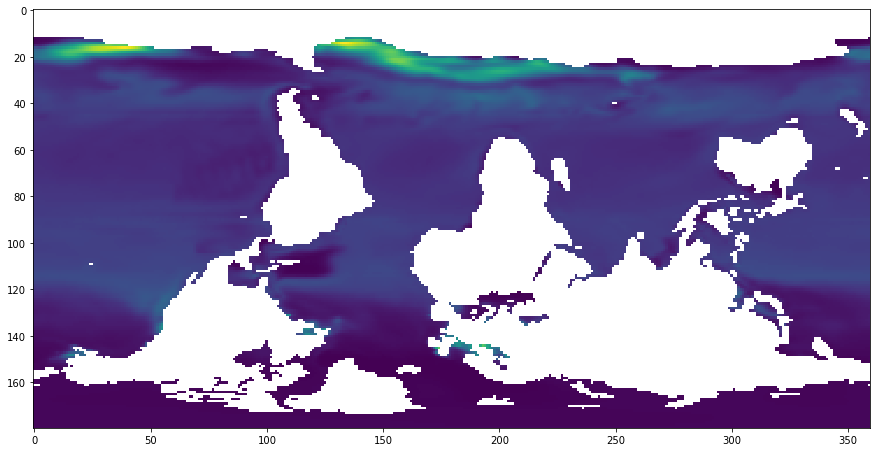

In [120]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(ds1.ppChl[0,0,:,:])

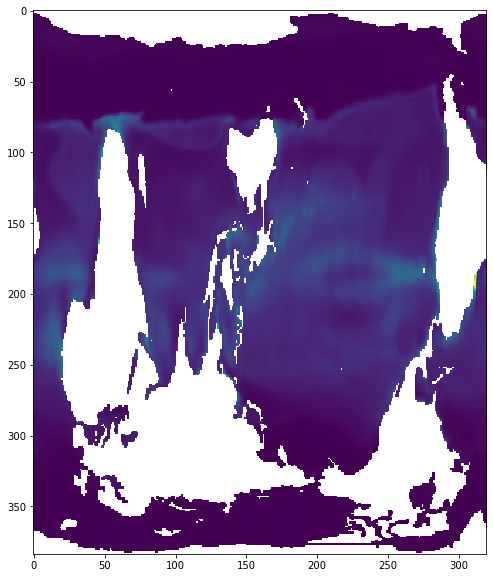

In [121]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(ds.ppChl[0,0,:,:])

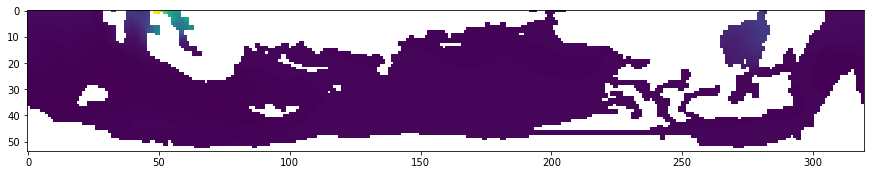

In [30]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(ds.ppChl[0,0,330:384,:])

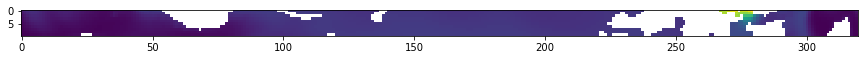

In [122]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(ds.ppChl[0,0,350:360,:])

In [32]:
ds.TLAT[330:370,0].values

array([51.26843454, 51.65624839, 52.04327673, 52.42955479, 52.81511904,
       53.20000729, 53.58425872, 53.9679139 , 54.35101489, 54.73360522,
       55.11573002, 55.49743607, 55.87877179, 56.25978741, 56.64053498,
       57.02106847, 57.40144384, 57.78171914, 58.16195462, 58.5422128 ,
       58.92255862, 59.30305953, 59.68378565, 60.06480988, 60.44620807,
       60.82805919, 61.21044552, 61.59345282, 61.97717056, 62.36169217,
       62.74711527, 63.133542  , 63.52107929, 63.90983923, 64.29993944,
       64.69150352, 65.08466153, 65.47955048, 65.87631498, 66.27510787])

In [33]:
ds.TLONG[0,:].values

array([320.56250892, 321.68750895, 322.81250898, 323.93750901,
       325.06250905, 326.18750908, 327.31250911, 328.43750914,
       329.56250917, 330.6875092 , 331.81250923, 332.93750926,
       334.0625093 , 335.18750933, 336.31250936, 337.43750939,
       338.56250942, 339.68750945, 340.81250948, 341.93750952,
       343.06250955, 344.18750958, 345.31250961, 346.43750964,
       347.56250967, 348.6875097 , 349.81250973, 350.93750977,
       352.0625098 , 353.18750983, 354.31250986, 355.43750989,
       356.56250992, 357.68750995, 358.81250998, 359.93750501,
         1.06250003,   2.18750006,   3.31250009,   4.43750012,
         5.56250015,   6.68750019,   7.81250022,   8.93750025,
        10.06250028,  11.18750031,  12.31250034,  13.43750037,
        14.56250041,  15.68750044,  16.81250047,  17.9375005 ,
        19.06250053,  20.18750056,  21.31250059,  22.43750062,
        23.56250066,  24.68750069,  25.81250072,  26.93750075,
        28.06250078,  29.18750081,  30.31250084,  31.43

In [113]:
nlat = 384
nlon = 320

arctic = np.empty((nlat,nlon))
arctic[:] = np.NaN

# Central Arctic 
arctic[::-5,:] = 0
# Chukchi Sea
arctic[330:370,180:205] = 1
# Beaufort Sea
arctic[330:370,205:235] = 2
# Canadian Archipelago
arctic[330:370,235:290] = 3
# Baffin Sea
arctic[330:370,290:315] = 4 # -45W to -70W
# Nordic Sea
arctic[330:370,-5:20] = 5
# Barents Sea
arctic[330:370,20:53] = 6
# Kara Sea
arctic[330:370,53:90] = 7
# Laptev Sea
arctic[330:370,90:145] = 8
# East Siberian Sea
arctic[330:370,145:180] = 9

In [58]:
ds.TLONG[0,:].values
# longitude values go from 0 to 360, which as long as I know how they translate to the regular -180 to 180 grid, then I think it will be okay! So, let's say that, Baffin Bay goes from -45 to -70, this means that ds.TLONG[0,315] would be equal to -45W. which is the value of 314.93750876. 
# if 314.93750876 == ds.TLONG[0:315] == -45W then, -70W would be ~290. 

array([320.56250892, 321.68750895, 322.81250898, 323.93750901,
       325.06250905, 326.18750908, 327.31250911, 328.43750914,
       329.56250917, 330.6875092 , 331.81250923, 332.93750926,
       334.0625093 , 335.18750933, 336.31250936, 337.43750939,
       338.56250942, 339.68750945, 340.81250948, 341.93750952,
       343.06250955, 344.18750958, 345.31250961, 346.43750964,
       347.56250967, 348.6875097 , 349.81250973, 350.93750977,
       352.0625098 , 353.18750983, 354.31250986, 355.43750989,
       356.56250992, 357.68750995, 358.81250998, 359.93750501,
         1.06250003,   2.18750006,   3.31250009,   4.43750012,
         5.56250015,   6.68750019,   7.81250022,   8.93750025,
        10.06250028,  11.18750031,  12.31250034,  13.43750037,
        14.56250041,  15.68750044,  16.81250047,  17.9375005 ,
        19.06250053,  20.18750056,  21.31250059,  22.43750062,
        23.56250066,  24.68750069,  25.81250072,  26.93750075,
        28.06250078,  29.18750081,  30.31250084,  31.43

In [99]:
ds.TLAT[-10::,0].values

array([68.3055509 , 68.72030553, 69.13847101, 69.56030556, 69.98608879,
       70.41612474, 70.85074575, 71.29031715, 71.73524335, 72.18597561])

In [92]:
ds.TLAT[:10,0].values

array([-79.22052261, -78.68630626, -78.15208992, -77.61787338,
       -77.08365664, -76.54943969, -76.01522253, -75.48100514,
       -74.94678751, -74.41256965])

In [112]:
ds.TLAT[::len(ds.TLAT)-10,0].values

array([-79.22052261,  68.3055509 ])

### Depth Integrate 
Each plankton groups will be depth integrated this equation looks like this.. 
$$Depth Integration = \frac{\sum_{0m}^{100m}{Biomass * z}}{100m}$$ 
Where i is the biomass of each of the pytoplankton groups

In [131]:
nlat = 384
nlon = 320

arctic = np.empty((nlat,nlon))
arctic[:] = np.NaN

# Central Arctic 
arctic[350:380,0:60] = 0

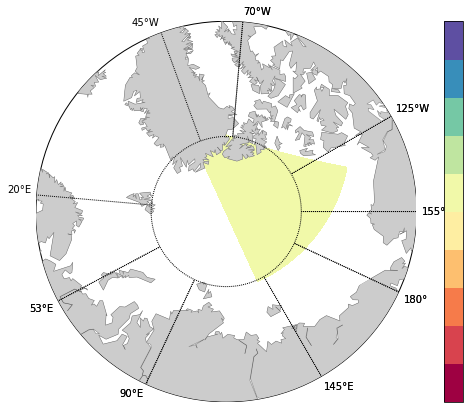

In [132]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.fillcontinents(color='gray')
tlon, tlat, chl = adjust_pop_grid(ds.TLONG, ds.TLAT, arctic)
x,y = m(tlon, tlat)
m.pcolormesh(x,y,arctic,shading='flat',cmap=plt.cm.get_cmap('Spectral', 10))
cbar=plt.colorbar() 
cbar.set_ticks([0.5,1.4,2.3,3.2,4.1,5.0,5.9,6.8,7.7,8.6])
cbar.set_ticklabels(['Central Arctic', 'Chukchi Sea', 'Beaufort Sea','Canadian Archipelago',
                     'Baffin Sea','Nordic Sea','Barents Sea','Kara Sea','Laptev Sea',
                     'East Siberian Sea'])
cbar.ax.tick_params(labelsize=16)


m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,290), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((290,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
m.plot
plt.show()

#fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/GNG595/Arctic_regions.png', dpi=600, bbox_inches='tight')